In [3]:
import pandas as pd
weather_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Vq-bDOReUWnJjUcck1DEHO4LFjqHKdIb')
weather_df.head()
weather_df.info()
weather_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181960 entries, 0 to 181959
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   province  181960 non-null  object 
 1   max       181960 non-null  int64  
 2   min       181960 non-null  int64  
 3   wind      181960 non-null  int64  
 4   wind_d    181960 non-null  object 
 5   rain      181960 non-null  float64
 6   humidi    181960 non-null  int64  
 7   cloud     181960 non-null  int64  
 8   pressure  181960 non-null  int64  
 9   date      181960 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 13.9+ MB


,max,min,wind,rain,humidi,cloud,pressure
count,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000,181960.000000
mean,29.837277,23.277874,11.038657,6.567130,77.083068,41.721268,1010.229127
std,4.571345,3.945381,5.311807,13.602055,9.288553,23.875067,4.635714
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000
25%,28.000000,21.000000,7.000000,0.100000,71.000000,23.000000,1008.000000
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000
75%,33.000000,26.000000,14.000000,7.500000,83.000000,58.000000,1012.000000
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000


In [ ]:
# Hãy tìm hiểu xem người ta thường tổng hợp dữ liệu thời tiết theo khoảng thời gian nào? Ví dụ: 1 tháng, 2 tháng, 3 tháng, hay năm?

In [4]:
print('Ngày bắt đầu thu thập dữ liệu:', weather_df['date'].min())
print('Ngày kết thúc thu thập dữ liệu:', weather_df['date'].max())

Ngày bắt đầu thu thập dữ liệu: 2009-01-01
Ngày kết thúc thu thập dữ liệu: 2021-06-18


0         2009-01-01
1         2010-01-01
2         2011-01-01
3         2012-01-01
4         2013-01-01
             ...    
181955    2016-12-28
181956    2017-12-28
181957    2018-12-28
181958    2019-12-28
181959    2020-12-28
Name: date, Length: 181960, dtype: object
0        2009-01-01
1        2010-01-01
2        2011-01-01
3        2012-01-01
4        2013-01-01
            ...    
181955   2016-12-28
181956   2017-12-28
181957   2018-12-28
181958   2019-12-28
181959   2020-12-28
Name: date, Length: 181960, dtype: datetime64[ns]


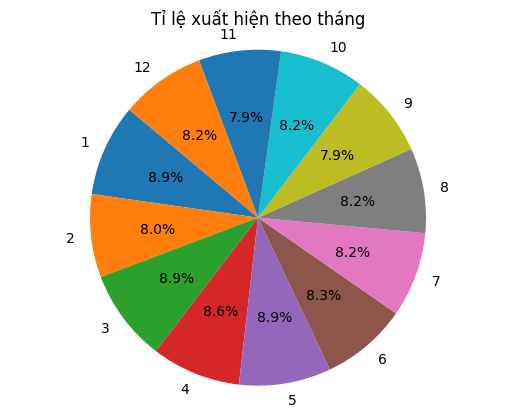

In [7]:
import matplotlib.pyplot as plt
print(weather_df['date'])
# Chuyển đổi cột Date thành đối tượng DateTime, loại bỏ các bản ghi không hợp lệ
weather_df['date'] = pd.to_datetime(weather_df['date'], format='%Y-%m-%d', errors='coerce')
#df.dropna(subset=['date'], inplace=True)
print(weather_df['date'])
# Nhóm dữ liệu theo tháng và tính tỉ lệ xuất hiện của mỗi tháng
weather_df['Month'] = weather_df['date'].dt.month
monthly_counts = weather_df.groupby('Month').size()
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  
plt.title('Tỉ lệ xuất hiện theo tháng')
plt.show()

In [8]:
# Phan tich du lieu theo year
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year
weather_df = weather_df[weather_df['date'].dt.year != 2021]

summary_by_year = weather_df.groupby('year').agg({
    'max': 'mean',
    'min': 'mean',
    'wind': 'mean',
    'rain': 'sum',
    'humidi': 'mean',
    'cloud': 'mean',
    'pressure': 'mean'
}).reset_index()


print(summary_by_year)

    year        max        min       wind      rain     humidi      cloud  \
0   2009  29.008973  22.872945  10.154726  104054.9  81.390479  41.191986   
1   2010  30.076644  23.283356   9.752945  107633.0  79.016370  39.357260   
2   2011  28.977740  22.387123  10.913288  103919.4  78.841918  42.741438   
3   2012  29.854315  23.366712  11.016849   95833.9  78.600753  40.448151   
4   2013  29.948082  23.224178  11.061918   97978.8  76.978151  39.866644   
5   2014  30.083630  23.151781  10.682534   81922.9  76.471027  38.166712   
6   2015  30.345685  23.676027  12.417055   86411.6  74.246644  38.114384   
7   2016  30.228767  23.589384  11.846164   91914.2  75.472329  41.591986   
8   2017  29.782192  23.406644  10.930548  117952.1  76.961644  43.041918   
9   2018  30.094178  23.601096  11.018014  104367.8  75.460274  41.161918   
10  2019  30.288836  23.807329  11.389178   88711.8  76.046849  38.540068   
11  2020  29.675753  23.385822  11.092466   92076.1  76.887192  53.117260   

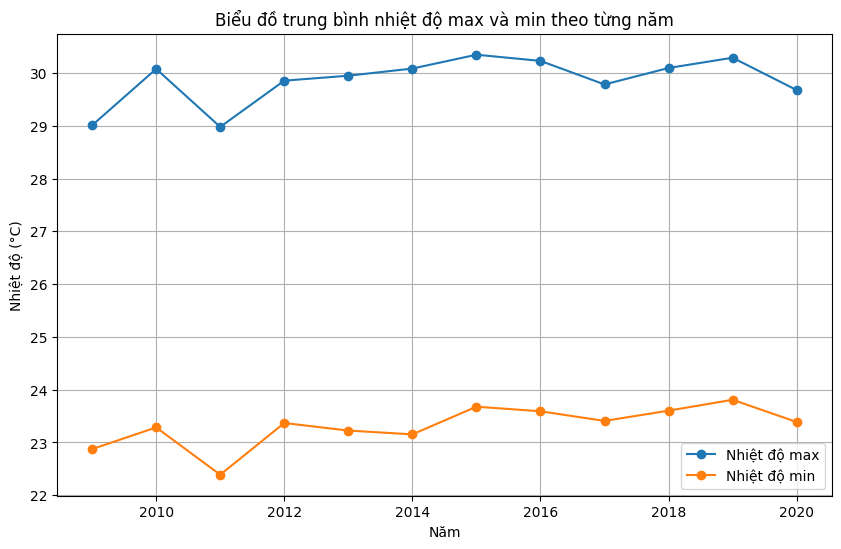

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(summary_by_year['year'], summary_by_year['max'], marker='o', label='Nhiệt độ max')
plt.plot(summary_by_year['year'], summary_by_year['min'], marker='o', label='Nhiệt độ min')
plt.xlabel('Năm')
plt.ylabel('Nhiệt độ (°C)')
plt.title('Biểu đồ trung bình nhiệt độ max và min theo từng năm')
plt.legend()
plt.grid(True)
plt.show()

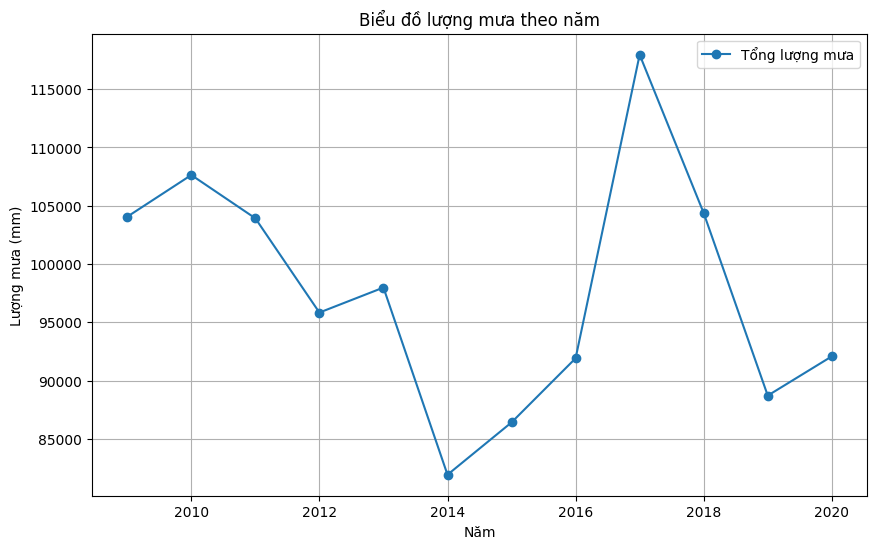

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(summary_by_year['year'], summary_by_year['rain'], marker='o', label='Tổng lượng mưa')
plt.xlabel('Năm')
plt.ylabel('Lượng mưa (mm)')
plt.title('Biểu đồ lượng mưa theo năm')
plt.legend()
plt.grid(True)
plt.show()

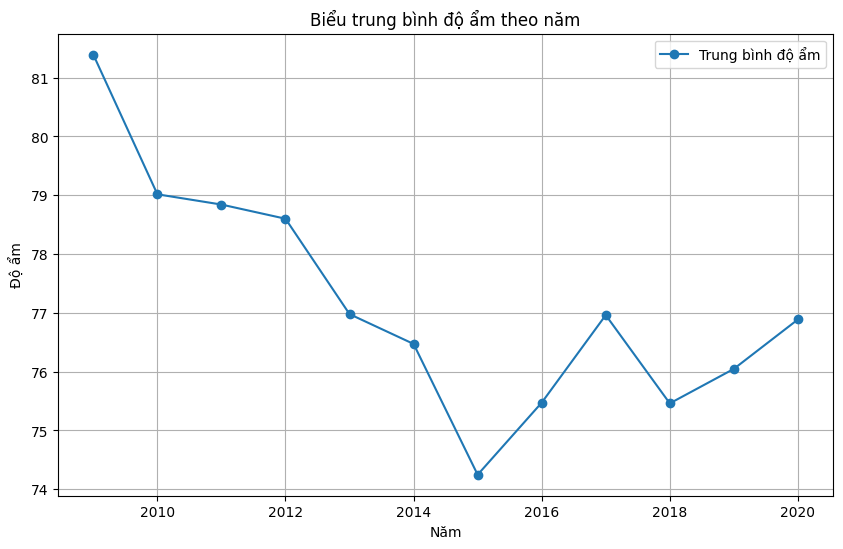

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(summary_by_year['year'], summary_by_year['humidi'], marker='o', label='Trung bình độ ẩm')
plt.xlabel('Năm')
plt.ylabel('Độ ẩm')
plt.title('Biểu trung bình độ ẩm theo năm')
plt.legend()
plt.grid(True)
plt.show()

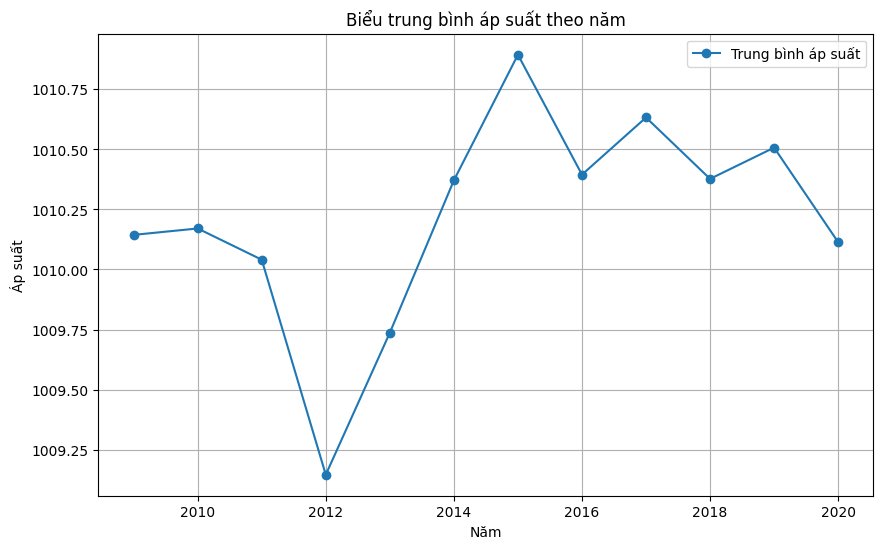

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(summary_by_year['year'], summary_by_year['pressure'], marker='o', label='Trung bình áp suất')
plt.xlabel('Năm')
plt.ylabel('Áp suất')
plt.title('Biểu trung bình áp suất theo năm')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18216\244258464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yen_bai_data['year'] = yen_bai_data['date'].dt.year


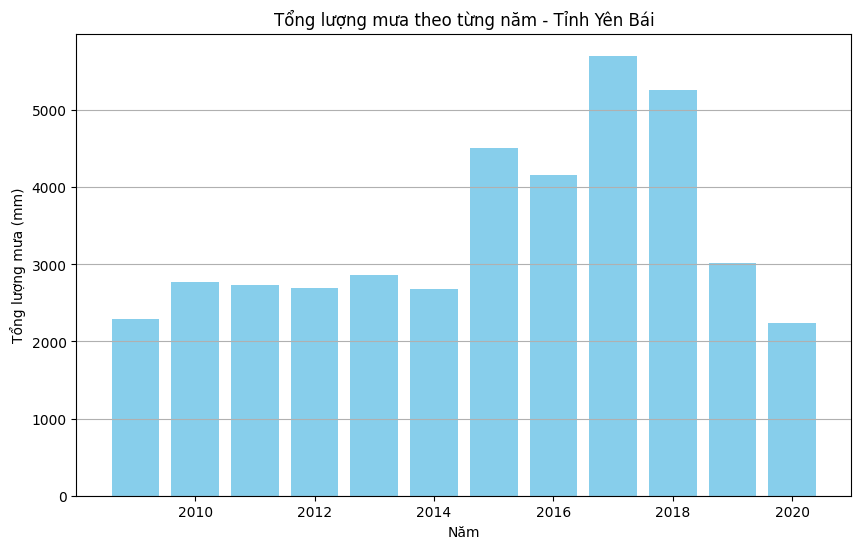

In [14]:
yen_bai_data = weather_df[weather_df['province'] == 'Yen Bai']
yen_bai_data['year'] = yen_bai_data['date'].dt.year

rain_by_year = yen_bai_data.groupby('year')['rain'].sum()

# Vẽ biểu đồ tổng lượng mưa theo từng năm cua Yen Bai
plt.figure(figsize=(10, 6))
plt.bar(rain_by_year.index, rain_by_year.values, color='skyblue')
plt.xlabel('Năm')
plt.ylabel('Tổng lượng mưa (mm)')
plt.title('Tổng lượng mưa theo từng năm - Tỉnh Yên Bái')
plt.grid(axis='y')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


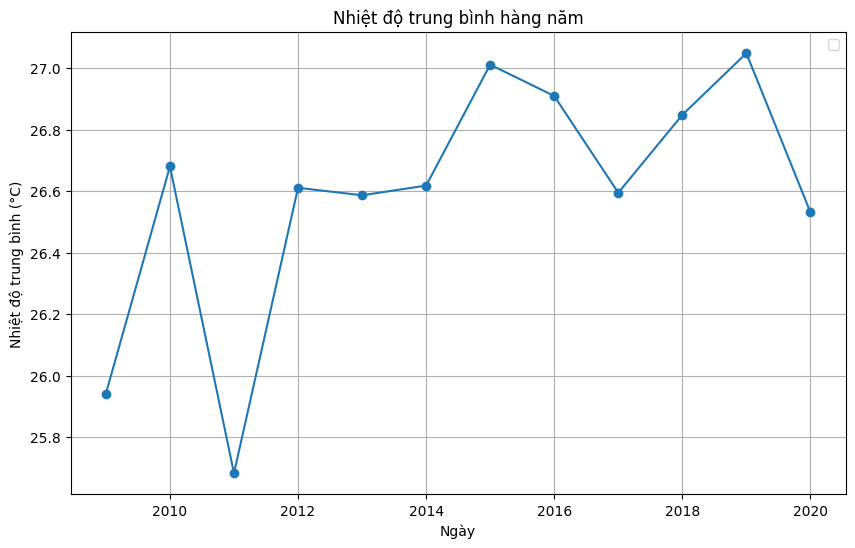

In [15]:
# Nhiet do trung binh hang nam toan bo
weather_df['average_temp'] = (weather_df['max'] + weather_df['min']) / 2

years = weather_df['year'].unique()
plt.figure(figsize=(10, 6))
avg_temp_by_year = weather_df.groupby(weather_df['date'].dt.year)['average_temp'].mean()

plt.plot(avg_temp_by_year.index, avg_temp_by_year.values, marker='o', linestyle='-')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.title('Nhiệt độ trung bình hàng năm')
plt.legend()
plt.grid(True)
plt.show()

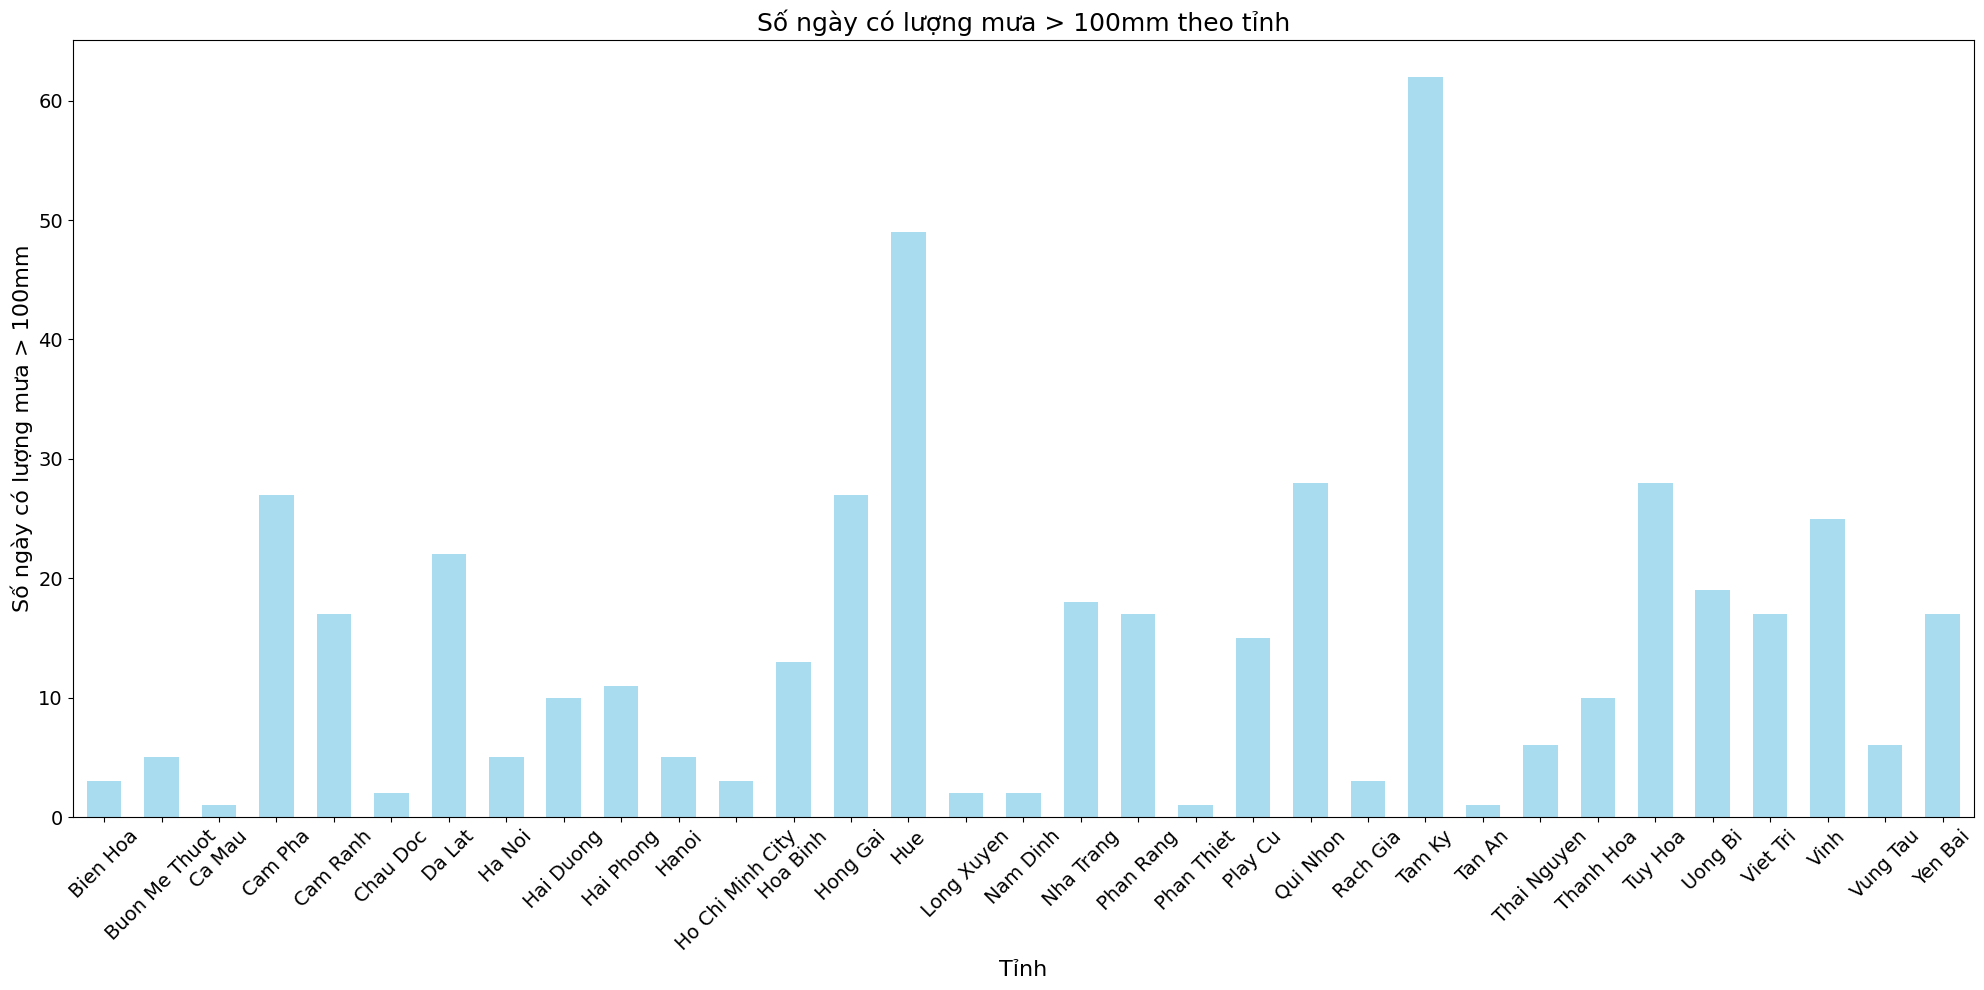

In [16]:
rainy_days = weather_df[weather_df['rain'] >= 100].groupby('province').size()

plt.figure(figsize=(20, 10))  # Chỉnh kích thước tổng thể của biểu đồ

rainy_days.plot(kind='bar', color='skyblue', alpha=0.7, width=0.6)  # Chỉnh độ rộng của các cột
plt.xlabel('Tỉnh', fontsize=16)  # Đặt kích thước của nhãn trục x
plt.ylabel('Số ngày có lượng mưa > 100mm', fontsize=16)  # Đặt kích thước của nhãn trục y
plt.title('Số ngày có lượng mưa > 100mm theo tỉnh', fontsize=18)  # Đặt kích thước của tiêu đề
plt.xticks(rotation=45, fontsize=14)  # Xoay và đặt kích thước của nhãn trục x
plt.yticks(fontsize=14)  # Đặt kích thước của nhãn trục y
plt.tight_layout()  # Tăng khoảng cách giữa các nhãn trục
plt.show()

In [18]:
#phan tich chenh lech nhiet do --> phan tich nhiet do cuc doan
weather_df['DIFFERENCE_Temperature'] = (weather_df['max'] - weather_df['min'])
print(weather_df['DIFFERENCE_Temperature'])

0         5
1         6
2         5
3         6
4         6
         ..
181955    5
181956    6
181957    2
181958    7
181959    5
Name: DIFFERENCE_Temperature, Length: 175200, dtype: int64


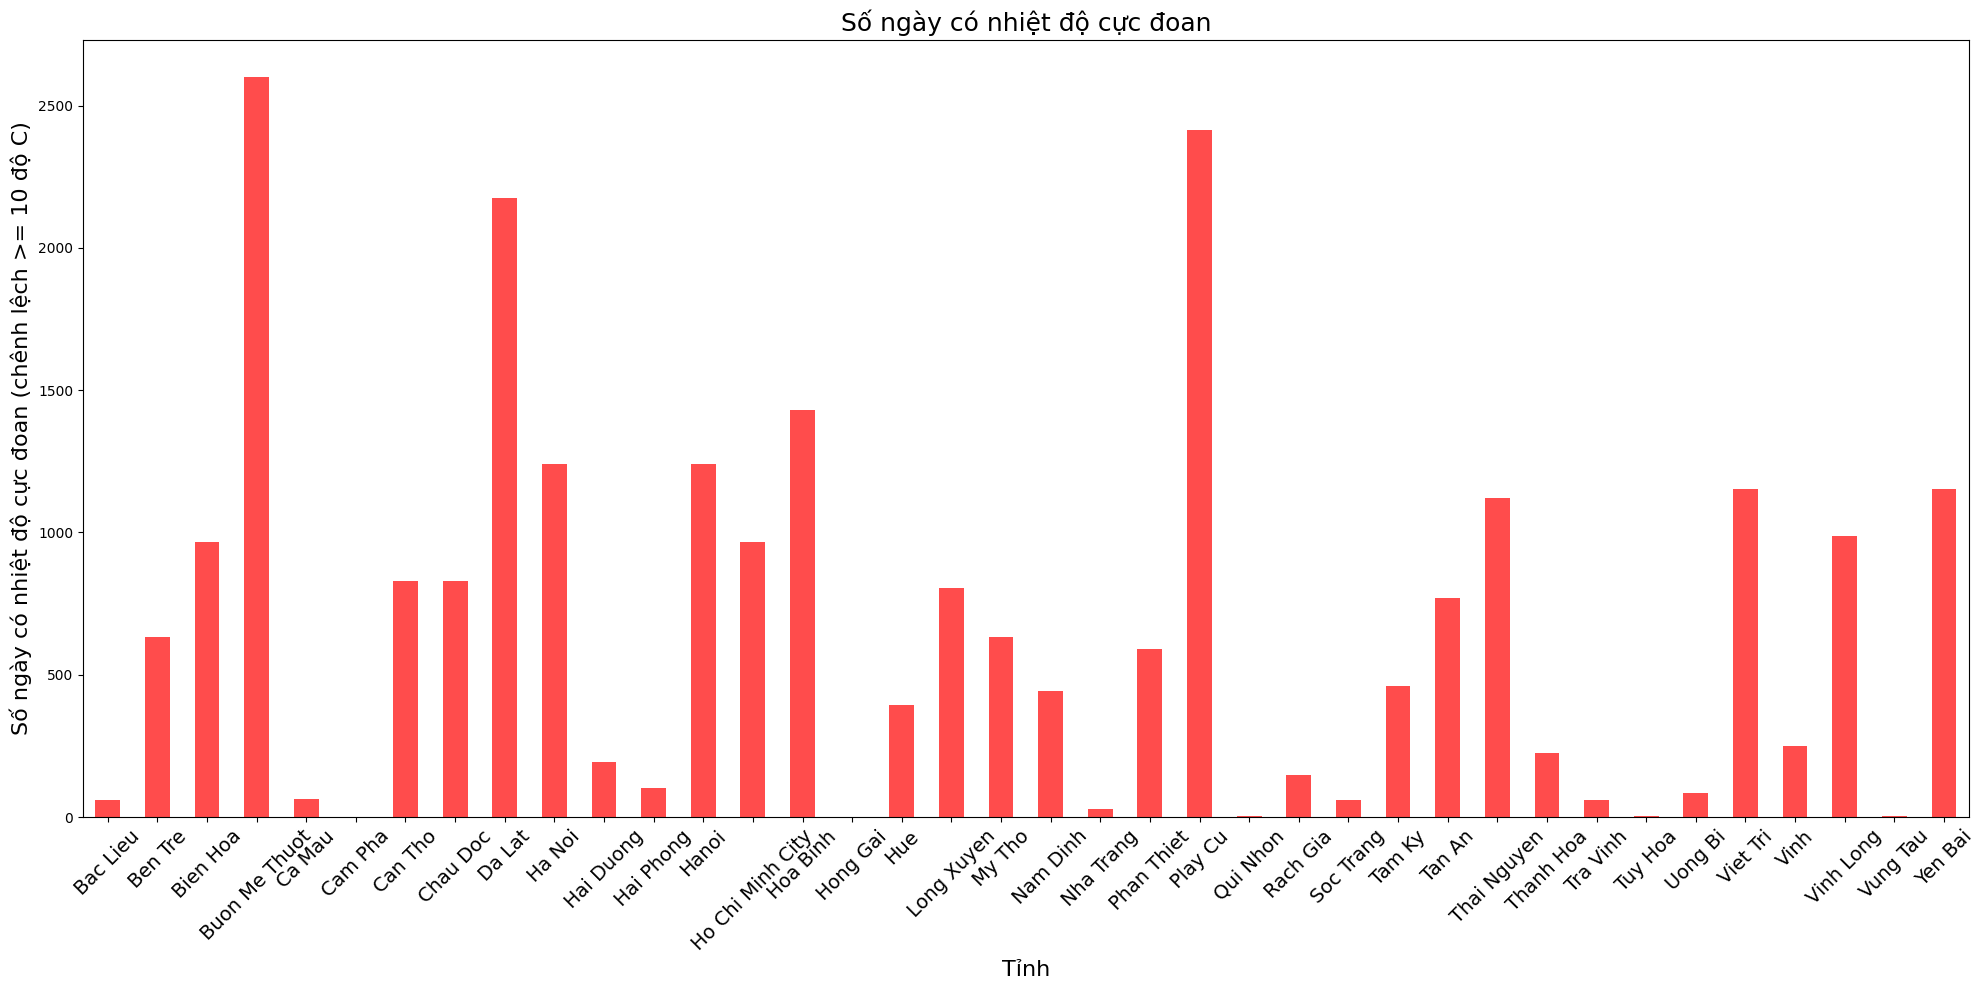

In [19]:
BadTemperature_days = weather_df[weather_df['DIFFERENCE_Temperature'] >= 10].groupby('province').size()

plt.figure(figsize=(20, 10))  # Chỉnh kích thước tổng thể của biểu đồ

BadTemperature_days.plot(kind='bar', color='red', alpha=0.7)  # Vẽ biểu đồ cột
plt.xlabel('Tỉnh', fontsize=16)  # Đặt kích thước của nhãn trục x
plt.ylabel('Số ngày có nhiệt độ cực đoan (chênh lệch >= 10 độ C)', fontsize=16)  # Đặt kích thước của nhãn trục y
plt.title('Số ngày có nhiệt độ cực đoan', fontsize=18)  # Đặt kích thước của tiêu đề
plt.xticks(rotation=45, fontsize=14)  # Xoay và đặt kích thước của nhãn trục x
plt.tight_layout()  # Tăng khoảng cách giữa các nhãn trục
plt.show()

In [20]:
print(weather_df['province'].unique())

['Bac Lieu' 'Ho Chi Minh City' 'Tam Ky' 'Ben Tre' 'Hoa Binh' 'Tan An'
 'Bien Hoa' 'Hong Gai' 'Thai Nguyen' 'Buon Me Thuot' 'Hue' 'Thanh Hoa'
 'Ca Mau' 'Long Xuyen' 'Tra Vinh' 'Cam Pha' 'My Tho' 'Tuy Hoa' 'Cam Ranh'
 'Nam Dinh' 'Uong Bi' 'Can Tho' 'Nha Trang' 'Viet Tri' 'Chau Doc'
 'Phan Rang' 'Vinh' 'Da Lat' 'Phan Thiet' 'Vinh Long' 'Ha Noi' 'Play Cu'
 'Vung Tau' 'Hai Duong' 'Qui Nhon' 'Yen Bai' 'Hai Phong' 'Rach Gia'
 'Hanoi' 'Soc Trang']


In [23]:
# Phân tích thời tiết theo vùng miền

region_mapping = {
    'Bac': ['Hoa Binh', 'Cam Pha', 'Tuy Hoa', 'Nam Dinh', 'Uong Bi', 'Viet Tri', 'Chau Doc', 'Ha Noi', 'Hai Duong', 'Yen Bai',
            'Hai Phong', 'Hanoi'],
    'Trung': ['Tam Ky', 'Hong Gai', 'Thai Nguyen', 'Buon Me Thuot', 'Hue', 'Thanh Hoa', 'Cam Ranh', 'Nha Trang', 'Phan Rang',
             'Vinh', 'Da Lat', 'Phan Thiet', 'Play Cu', 'Qui Nhon'],
    'Nam': ['Bac Lieu', 'Ho Chi Minh City', 'Ben Tre', 'Tan An', 'Bien Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'My Tho',
            'Can Tho', 'Vinh Long', 'Vung Tau', 'Rach Gia', 'Soc Trang']
}
weather_df['region'] = ''
for region, provinces_list in region_mapping.items():
    weather_df.loc[weather_df['province'].isin(provinces_list), 'region'] = region

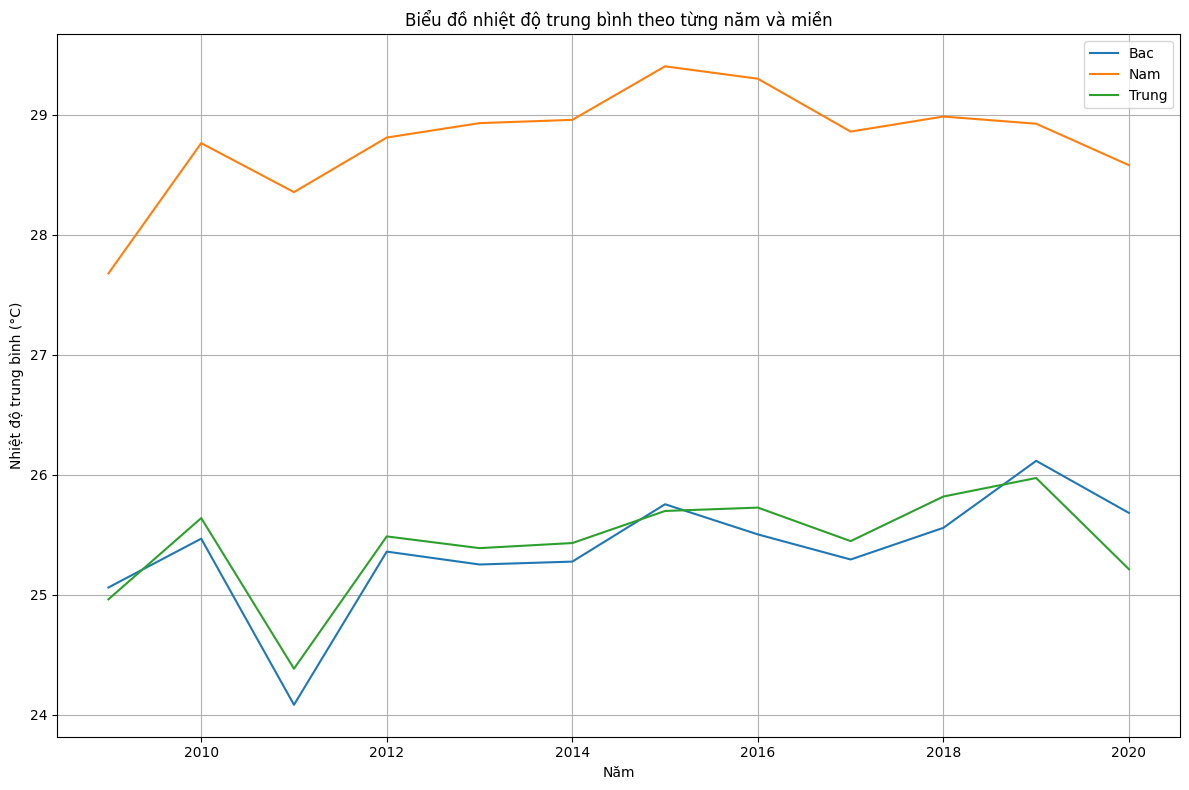

In [24]:
# Tính nhiệt độ trung bình theo từng năm theo miền
avg_temp_by_year_and_region = weather_df.groupby(['region', weather_df['date'].dt.year])['average_temp'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Lặp qua từng miền
for region in avg_temp_by_year_and_region.index.levels[0]:
    region_data = avg_temp_by_year_and_region.loc[region]
    years = region_data.index
    temps = region_data.values
    plt.plot(years, temps, label=region)

plt.xlabel('Năm')
plt.ylabel('Nhiệt độ trung bình (°C)')
plt.title('Biểu đồ nhiệt độ trung bình theo từng năm và miền')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

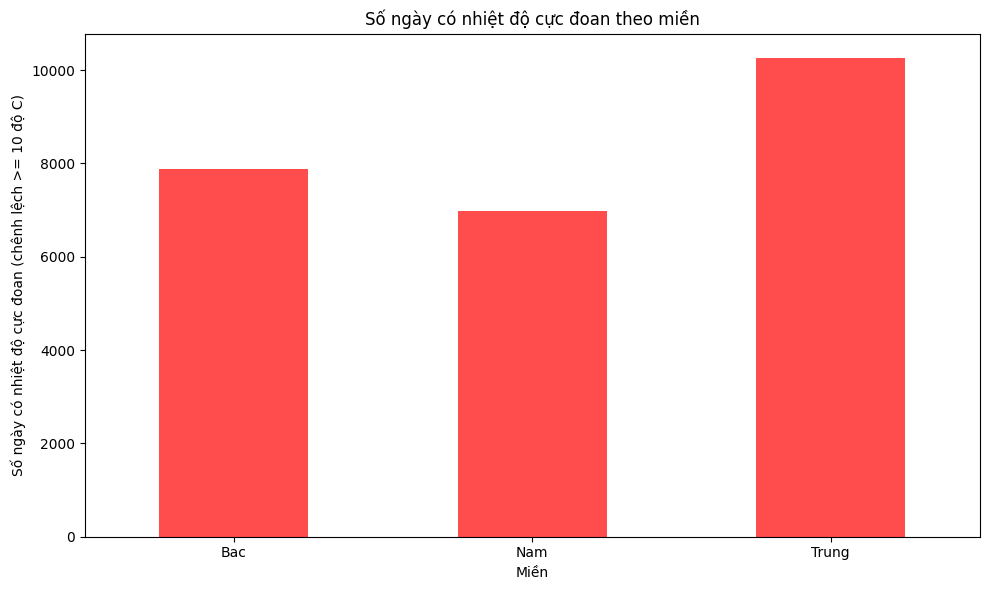

In [25]:
# Tính số ngày có nhiệt độ cực đoan theo miền
bad_temp_by_region = weather_df[weather_df['DIFFERENCE_Temperature'] >= 10].groupby('region').size()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bad_temp_by_region.plot(kind='bar', color='red', alpha=0.7)
plt.xlabel('Miền')
plt.ylabel('Số ngày có nhiệt độ cực đoan (chênh lệch >= 10 độ C)')
plt.title('Số ngày có nhiệt độ cực đoan theo miền')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

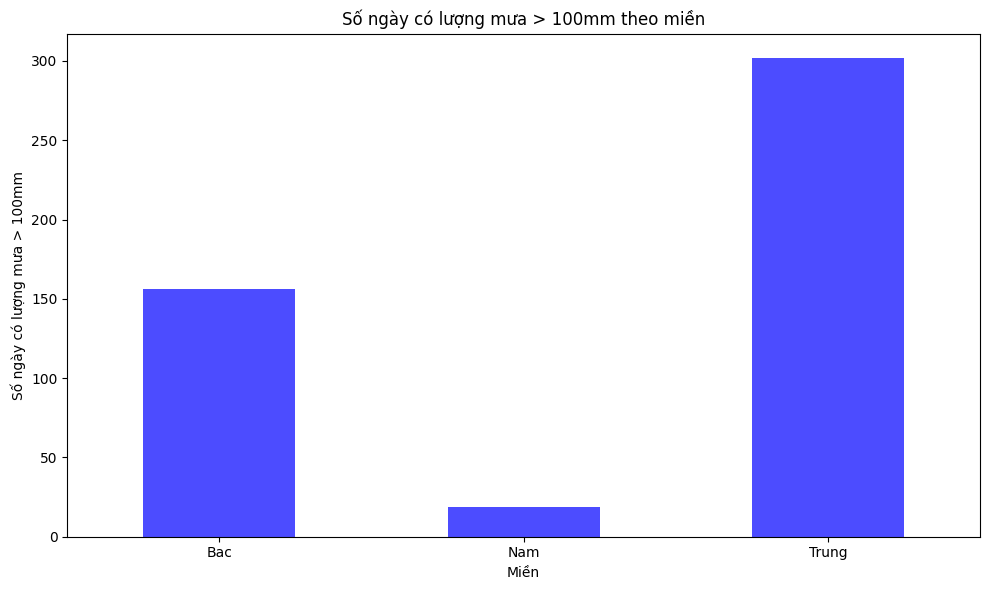

In [27]:
# Tính số ngày có lượng mưa cực đoan theo miền
bad_temp_by_region = weather_df[weather_df['rain'] >= 100].groupby('region').size()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bad_temp_by_region.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Miền')
plt.ylabel('Số ngày có lượng mưa > 100mm')
plt.title('Số ngày có lượng mưa > 100mm theo miền')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()